# Linear Regression

<img src='https://miro.medium.com/max/1400/1*2ZnDb5b6UtBZ41Wy90MTkw.jpeg'>

# Metal rod expansion with different temperatures:

We all know that when the temperature of a metal increases, it begins to expand. So, we experimented with exposing a metal rod to different temperatures and recorded its length as follows:

x = [20,25,30,35,40,45,50,55,60,65]

y = [0.5,1.8,5,6.2,6,6.5,7.8,9.4,9.8,10.9]

In [34]:
import matplotlib.pyplot as plt
import numpy as np

In [35]:
x = np.array([20,25,30,35,40,45,50,55,60,65])
y = np.array([0.5,1.8,5,6.2,6,6.5,7.8,9.4,9.8,10.9])
x_test = np.linspace(20,65,num=100)

In [36]:
# Simple linear regression
def LR(x,y):
    # Mean X and Y
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    # Total number of values
    n = len(x)
    # Using the formula to calculate 'a' and 'b'
    numerator = 0
    denomenator = 0
    for i in range(n):
        numerator += (x[i] - mean_x) * (y[i] - mean_y)
        denomenator += (x[i] - mean_x) ** 2
    a = numerator / denomenator
    b = mean_y - (a * mean_x)
#     print("Coefficients")
#     print(a, b)
    return a,b

# Linear regression

0.21442424242424246 -2.7230303030303054


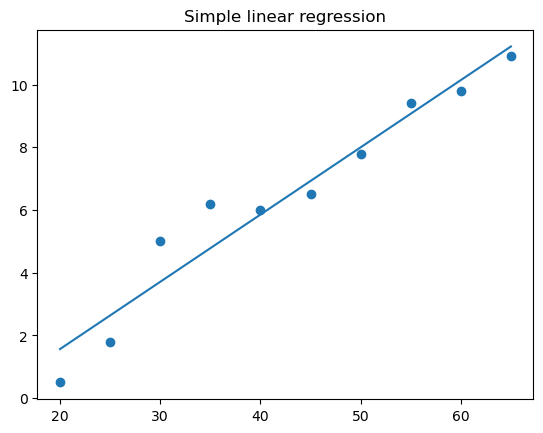

In [37]:
a,b = LR(x,y)
print(a,b)
y_pred = a*x_test + b
plt.title("Simple linear regression")
plt.plot(x_test,y_pred)
plt.scatter(x,y);

# 2. Multiple Linear Regression "Polynomial"

In [38]:
x**3

array([  8000,  15625,  27000,  42875,  64000,  91125, 125000, 166375,
       216000, 274625], dtype=int32)

In [39]:
# Normal equation
def calculate_w(x,y):
    xt_x = x @ x.T
    xt_x_inv = np.linalg.pinv(xt_x) #(3,3)
    x_y = x @ y.reshape((10,1)) #(3,1)
    w = xt_x_inv @ x_y #(3,1)

    return w

In [40]:
def polynomial(x, degree):
    x_pol = []
    ## write your code
    for i in range(1,degree+1):
      x_pol.append(x**i)

    x_pol.append(np.ones(len(x)))
    return np.array(x_pol)

In [41]:
x_pol = polynomial(x,2)
w = calculate_w(x_pol, y)

In [42]:
x_twst_pol = polynomial(x,2)
x_pol.T.shape

(10, 3)

In [43]:
np.ones(len(x))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Shape of x_test_pol (4, 100)
Shape of W (4, 1)


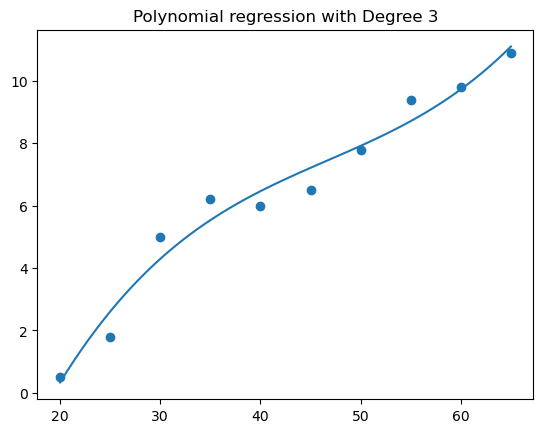

In [45]:
degree = 3
x_pol = polynomial(x, degree)
w = calculate_w(x_pol, y)
x_test_pol = polynomial(x_test, degree)
print("Shape of x_test_pol", x_test_pol.shape)
print("Shape of W", w.shape)
y_pred = np.matmul(x_test_pol.T, w)

plt.plot(x_test, y_pred)
plt.title(f"Polynomial regression with Degree {degree}")
plt.scatter(x,y);